Best Kernel Type: rbf
Confusion Matrix:
[[64  4]
 [ 3 29]]
Accuracy: 0.93


C:\Users\acer\AppData\Local\Temp\ipykernel_11968\2750920943.py:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


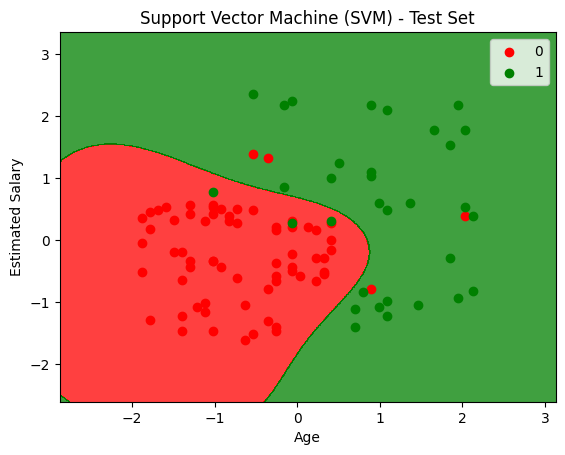

In [4]:

# Step 1: Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score


# Step 2: Load the dataset and select independent variables
dataset = pd.read_csv('Social_Network_Ads(2).csv')
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

# Step 3: Perform data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Step 5: Train the SVM model and determine the best kernel type
kernels = ['linear', 'rbf', 'poly']
accuracy_scores = []
for kernel in kernels:
    classifier = SVC(kernel=kernel, random_state=0)
    classifier.fit(X_train, y_train)
    accuracy_scores.append(classifier.score(X_test, y_test))

best_kernel = kernels[np.argmax(accuracy_scores)]
print("Best Kernel Type:", best_kernel)

# Step 6: Generate the confusion matrix
classifier = SVC(kernel=best_kernel, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 7: Visualize the SVM result on the test set
x1, x2 = np.meshgrid(np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01),
                     np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Support Vector Machine (SVM) - Test Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



# Step 9 Opinion on model performance

Based on the performance of the SVM and Logistic Regression models, both models have achieved a similar accuracy of 0.93, correctly classifying 93% of the instances in the test set.
Overall, both models have demonstrated a good ability to predict the buyers of the new mobile phone, with similar accuracy rates